## Домашнее задание №3

### Укажите ФИО и группу
Обершт София Дмитриевна гр. 23153

Добрый день,  

Вам предлагается ответить на ряд вопросов для того, чтобы закрепить пройденный материал да и просто хорошо и с некоторой пользой провести несколько часов...  
  
Код, который вы пришлете, должен быть рабочим...

### Импортируем необходимые модули

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [ ]:
import numpy as np
import scipy, warnings, copy
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import seaborn as sns 

from sklearn import preprocessing, decomposition, manifold, model_selection, pipeline, cluster, datasets, mixture, metrics
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score, ConfusionMatrixDisplay

from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import make_regression, make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [ ]:
## функция для генерации "предсказаний" с заданным уровнем ошибок
def make_errors(Y, frac = .3, seed = 42):
    """
    Y - our "true" binary labels
    frac - the "desired" error rate
    """
    np.random.seed(seed)
    ## выберем индексы ответов, которые у нас будут ошибочными
    ix = np.random.choice(range(len(Y)), replace=False, size =int(len(Y) * frac))
    Ys = copy.copy(Y) ## создадим копию массива с ответами, чтобы не изменять оригинальные ответы
    Ys[ix] = np.abs(Y[ix] - 1) ## инвертируем метки классов
    return Ys

### В этом задании у вас три сгенерированных заранее датасета, остальные есть в этом ноутбуке. В этом домашнем задании 5 пунктов + 1 бонусный. Всего за эту домашку можно получить 10 баллов.

Рекомендую внимательно ознакомиться с материалами, которые я вам выдал, посмотреть ссылки на дополнительные материалы, а для заинтересованных в теме &mdash; пройти дополнительные курсы по анализу данных и машинному обучению. Прошу обратить внимание на задания и вопросы, которые изредка, но встречаются в ноутбуках данного курса. Лучше их все-таки выполнить. Если не можете что-то сделать самостоятельно &mdash; спрашивайте.

### 1. Оценка классификаторов (2 балла).

1. В первой части задания вам необходимо работать с заранее сгенерированными массивами предсказанных и настоящих меток классов (Y_predicted, Y_true). Необходимо:

    * Построить для них матрицу ошибок (confusion matrix)
    * Определить Accuracy, Precision, Recall, F1-метрику
    * Построить график ROC, определите значение AUC
    * Проверить, можно ли улучшить качество предсказания метки класса? Верно ли подобрано пороговое значение? (бонусный пункт)
    
    
2. Во второй части задания вам будет дан набор, в котором есть 200 объектов: 20 из класса 1 и 180 из класса 0. Для него будут доступны новые истинные метки классов, а также результаты предсказания нескольких алгоритмов. От вас требуется:

    * Определить accuracy для каждого из методов. Какой из них лучше? Определить это также и для F1-метрики.
    * Посчитать метрики accuracy и F1 для консенсусных предсказаний (пояснения в коде). Изменилось ли что-нибудь?
    * Какой вывод вы можете сделать из данного упражнения?



```
# Выбран кодовый формат
```

#### Первая часть

In [ ]:
## результаты "предсказания"
# np.random.seed(0) ## зафиксируем random seed
# Yp = np.random.uniform(0, 0.9, 100) ## синтезируем ответы
Y_predicted = np.array([0.49393215, 0.64367043, 0.54248704, 0.49039486, 0.38128932, 0.5813047 , 0.39382849, 0.8025957 ,
            0.86729648, 0.34509737, 0.71255253, 0.47600543, 0.5112401 , 0.83303697, 0.06393245, 0.07841637,
            0.01819656, 0.74935786, 0.70034108, 0.78301093, 0.88075651, 0.71924271, 0.41533143, 0.70247626,
            0.10644698, 0.57592892, 0.12901796, 0.85020203, 0.46966349, 0.37319575, 0.23810005, 0.69681032,
            0.4105353 , 0.51159055, 0.01691082, 0.55587195, 0.55088615, 0.5552406 , 0.84937327, 0.61363827,
            0.32355711, 0.39332876, 0.62786808, 0.05420292, 0.60009004, 0.60357408, 0.1893443 , 0.11603367,
            0.28388552, 0.32733969, 0.51317709, 0.39474136, 0.88953645, 0.09184033, 0.18798908, 0.14517857,
            0.58779749, 0.22796244, 0.4196797 , 0.21998303, 0.14307263, 0.09933763, 0.59069663, 0.12436466,
            0.17692413, 0.33185265, 0.73889391, 0.08739115, 0.75415042, 0.08648857, 0.87881352, 0.42178608,
            0.87908498, 0.54436097, 0.66533722, 0.03526901, 0.25452627, 0.10817691, 0.26652618, 0.10685495,
            0.28618486, 0.3728367 , 0.05773275, 0.62322491, 0.50994131, 0.23885054, 0.47092325, 0.08454646,
            0.51835185, 0.83636658, 0.28671206, 0.60066934, 0.11861808, 0.64469448, 0.26046548, 0.16487223,
            0.52786164, 0.01809679, 0.74604603, 0.00422593])

## настоящие ответы - метки классов
Y_true = np.array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
            0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
            1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
            1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
            0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=np.int64)

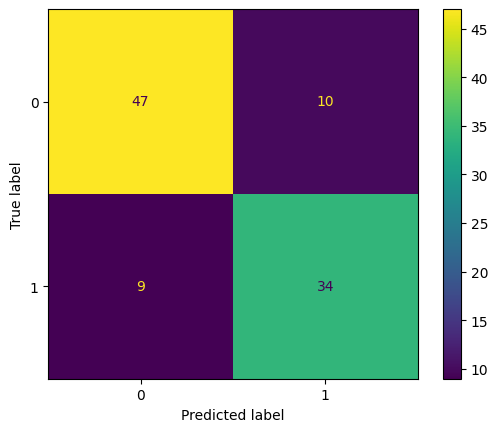

In [ ]:
## 1. Постройте матрицу ошибок -- confusion matrix
round = 0.5
Y_pred_class = np.zeros(len(Y_predicted))
Y_pred_class[Y_predicted >= round] = 1
conf_mx = confusion_matrix(Y_true, Y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mx)
disp.plot()

In [ ]:
## 2. Определите Accuracy, Precision, Recall, F1-метрику
#accuracy_score
acc = accuracy_score(Y_true, Y_pred_class)
print('accuracy = ', acc)
#precision_score
prec = precision_score(Y_true, Y_pred_class)
print('precision = ', prec)
#recall_score
recall = recall_score(Y_true, Y_pred_class)
print('recall = ', recall)
#f1_score
f1 = f1_score(Y_true, Y_pred_class)
print('F1 = ', f1)

accuracy =  0.81
precision =  0.7727272727272727
recall =  0.7906976744186046
F1 =  0.7816091954022988


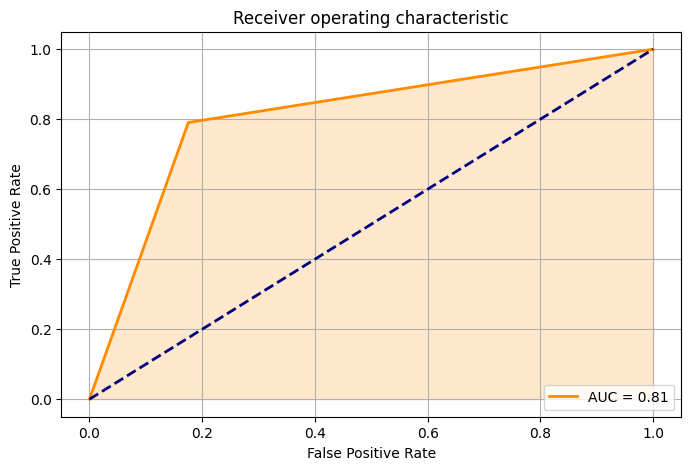

In [ ]:
## 3. Постройте график ROC, определите значение AUC
roc_auc = metrics.roc_auc_score(y_score = Y_pred_class, y_true=Y_true)
fpr, tpr, thresholds = metrics.roc_curve(Y_true, Y_pred_class)

_, axs = plt.subplots(figsize = (8, 5))
sns.lineplot(x=fpr, y=tpr, color='darkorange',
             lw=2, label='AUC = %0.2f' % roc_auc, ax=axs)
axs.fill_between(fpr, tpr, alpha=0.2, color='darkorange')
axs.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs.set_xlabel('False Positive Rate'); axs.set_ylabel('True Positive Rate')
axs.set_title('Receiver operating characteristic')
axs.legend(loc="lower right")
axs.grid()

In [ ]:
print (np.quantile(Y_predicted, [0.25, 0.5, 0.75]))

[0.18522284 0.42073289 0.61603493]


#### Вторая часть

In [ ]:
## Вам дан набор, в котором есть 200 объектов: 20 из класса 1 и 180 из класса 0
## Y   - истинные метки классов
## Yp1 - результаты предсказания алгоритма 1
## Yp2 - результаты предсказания алгоритма 2
## Yp3 - результаты предсказания алгоритма 3
## Yp4 - результаты предсказания алгоритма 4
np.random.seed(42)
Y =  np.hstack( [ np.ones(20), np.zeros(180) ] )
np.random.shuffle(Y)
Yp1 = make_errors(Y, 0.25, seed = 9)
Yp2 = make_errors(Y, 0.25, seed = 42)
Yp3 = make_errors(Y, 0.25, seed = 1024)
Yp4 = np.zeros(200)

In [ ]:
## Определите accuracy, F1 каждого из методов
acc1 = accuracy_score(Y, Yp1)
f1_1 = f1_score(Y, Yp1)
print('1 method: accuracy = ', acc1, ' F1 = ', f1_1)
acc2 = accuracy_score(Y, Yp2)
f1_2 = f1_score(Y, Yp2)
print('2 method: accuracy = ', acc2, ' F1 = ', f1_2)
acc3 = accuracy_score(Y, Yp3)
f1_3 = f1_score(Y, Yp3)
print('3 method: accuracy = ', acc3, ' F1 = ', f1_3)
acc4 = accuracy_score(Y, Yp4)
f1_4 = f1_score(Y, Yp4)
print('4 method: accuracy = ', acc4, '  F1 = ', f1_4)

1 method: accuracy =  0.75  F1 =  0.3055555555555555
2 method: accuracy =  0.75  F1 =  0.41860465116279066
3 method: accuracy =  0.75  F1 =  0.375
4 method: accuracy =  0.9   F1 =  0.0


In [ ]:
## Какой из методов лучше?
## по метрике accuracy наилучший метод - 4, но по метрике F1 - он самый плохой, а самый точный - 2 (F1=[0, 1])

In [ ]:
## Используйте результаты моделей №1-3 -- возьмем и усредним результаты их предсказаний:
Yc = ((Yp1 + Yp2 + Yp3)/3 > 0.5).astype(int)

In [ ]:
## Оцените результат по метрикам Accuracy и F1, стал ли он лучше? Почему?
acc = accuracy_score(Y, Yc)
f1 = f1_score(Y, Yc)
print('mean 1-3: acc = ', acc, '  F1 = ', f1)

mean 1-3: acc =  0.875   F1 =  0.5762711864406781


In [ ]:
## усредненный результат по всем метрикам лучше.
## По теореме Кондорсе: при объединении нескольких методов вероятность определения класса повышается

In [ ]:
## Можете добавить к вычислению консенсуса результат Yp4. Определите метрики Accuracy и F1. Что изменилось?
Yc = ((Yp1 + Yp2 + Yp3 + Yp4)/4 > 0.5).astype(int)

In [ ]:
acc = accuracy_score(Y, Yc)
f1 = f1_score(Y, Yc)
print('mean 1-4: acc = ', acc, '  F1 = ', f1)

mean 1-4: acc =  0.925   F1 =  0.5161290322580645


In [ ]:
## за счет правильного определения доминирующего 0 класса accuracy с добавлением 4 метода увеличивается,
## однако поскольку в нем F1 = 0 => TP = 0 и определение правильного класса уменьшается, т.е. F1 уменьшается

In [ ]:
## Какой вывод вы можете сделать из данного упражнения?

In [ ]:
##методы, дающие по отдельности плохие результаты, в ансамбле увеличивают точность, но нужно также следить за метриками методов в отдельности

### 2. Исследование корреляций (1 балл).

В вашем распоряжении оказался некий датасет (наблюдения за экспрессией некоторых генов, рекомендательная база данных для ассортимента интернет-маркета, относительный расход электричества в домах в некотором городе и т.д.). Вам необходимо:

1. Посмотреть корреляцию датасета с целевой переменной. Есть ли такие признаки, абсолютное значение коэффициента корреляции для которых > 0.5?
2. Посмотреть корреляцию между признаками внутри датасета. Какое распределение у абсолютных значений коэффициентов корреляции Пирсона для первого признака? Много ли там признаков, абсолютное значение коэффициента корреляции для которых > 0.5?
3. Увеличить/уменьшить количество наблюдений N = 10, N = 100
4. Уменьшить количество признаков в данных: D = 100, 500, 5000
5. Дать ответы на вопросы:
    - Чем обусловлены наши проблемы с этим набором данных?
    - Как можно бороться со случайными корреляциями?
    - Почему при тестировании нескольких статистических гипотез необходимо проводить поправку на множественную проверку гипотез?

In [ ]:
np.random.seed(42)
N = 30    ## количество наблюдений
D = 10000 ## размерность наших данных -- например, число некоторых генов, экспрессию которых мы изучаем
Y = pd.Series(np.random.normal(0, 1, N)) ## это какие-то наши целевые значения
X = pd.DataFrame( np.random.normal(0, 1, (N, D)) ) ## это наши независимые переменные, скажем экспрессия некоторых генов
## как мы видим все эти данные абсолютно случайные...

"гены",корреляции для которых > 0.5 =  18.946006889850032


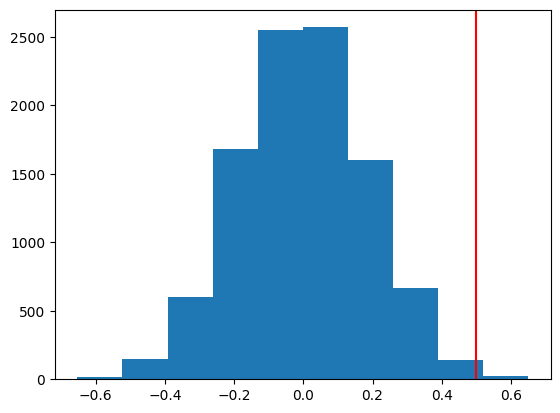

In [ ]:
## можем ли мы получить высокую корреляцию с нашей целевой переменной?
## корреляция двух случайных независимых величин = 0, поэтому не можем
ccY = X.corrwith(Y)
## посмотрите на распределение значений. Есть ли такие "гены", абсолютное значение коэффициента корреляции для которых > 0.5
plt.hist(ccY)
plt.axvline(x = 0.5, color = 'red')
print('"гены",корреляции для которых > 0.5 = ', ccY[ccY > 0.5].sum())

(array([[  2.,  41., 528., ...,  59.,   1.,   1.],
        [  1.,  29., 541., ...,  72.,   0.,   1.],
        [  0.,  30., 532., ...,  79.,   1.,   1.],
        ...,
        [  0.,  35., 517., ...,  60.,   1.,   1.],
        [  0.,  39., 506., ...,  69.,   1.,   1.],
        [  0.,  31., 538., ...,  68.,   0.,   1.]]),
 array([-0.85297741, -0.66767967, -0.48238193, -0.29708419, -0.11178645,
         0.07351129,  0.25880903,  0.44410678,  0.62940452,  0.81470226,
         1.        ]),
 <a list of 10000 BarContainer objects>)

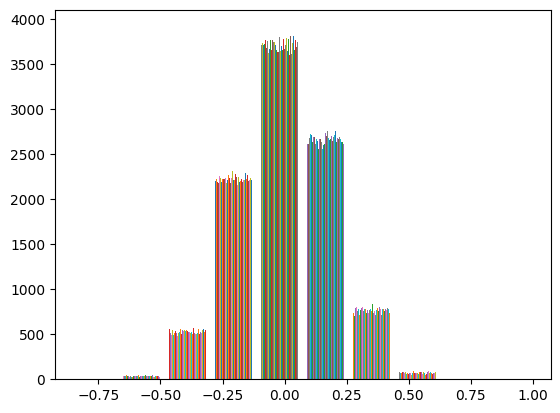

In [ ]:
## теперь давайте проведем аналогичный эксперимент для нашей матрицы X...
## определим "коэкспрессию" ...
ccX = X.corr()
plt.hist(ccX)

10.817872642977806


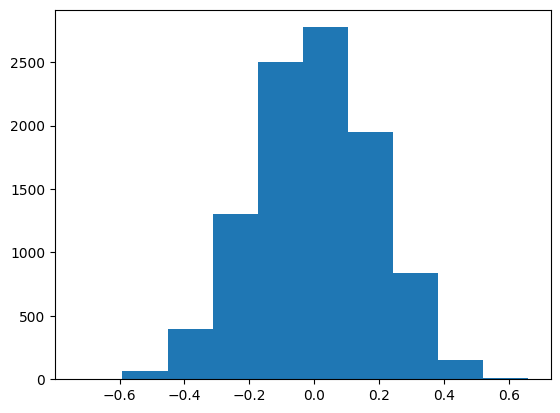

In [ ]:
## Посмотрите на респределение абсолютных значений коэффициентов корреляции Пирсона
## Например для первого гена из нашего массива данных:
ccX_1 = ccX.iloc[0,1:]
plt.hist(ccX_1)
## много ли получилось генов с коэфф. корреляции > 0.5? 1% всего массива
print(ccX_1[ccX_1 > 0.5].sum())

In [ ]:
## Попробуйте увеличить/уменьшить количество наблюдений N = 10, N = 100
N = 10
D = 10000
Y = pd.Series(np.random.normal(0, 1, N))
X = pd.DataFrame( np.random.normal(0, 1, (N, D)) )

"гены",корреляции для которых > 0.5 =  437.4916788860802


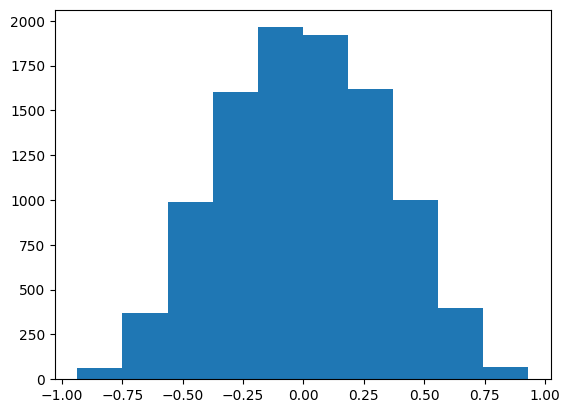

In [ ]:
ccY = X.corrwith(Y)
plt.hist(ccY)
print('"гены",корреляции для которых > 0.5 = ', ccY[ccY > 0.5].sum())

4337340.651597605


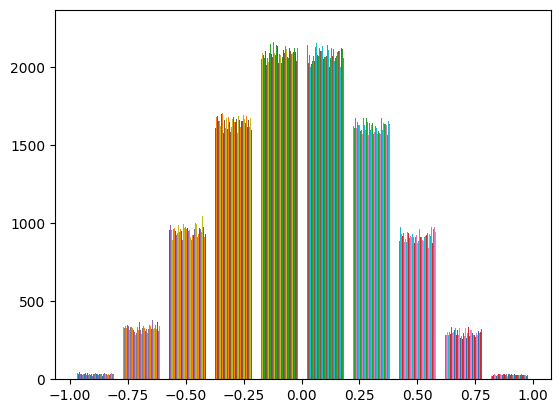

In [ ]:
ccX = X.corr()
plt.hist(ccX)
print(ccX[ccX > 0.5].sum().sum())

In [ ]:
## Попробуйте увеличить/уменьшить количество наблюдений N = 10, N = 100
N = 100
D = 1000
Y = pd.Series(np.random.normal(0, 1, N))
X = pd.DataFrame( np.random.normal(0, 1, (N, D)) )

"гены",корреляции для которых > 0.5 =  0.0


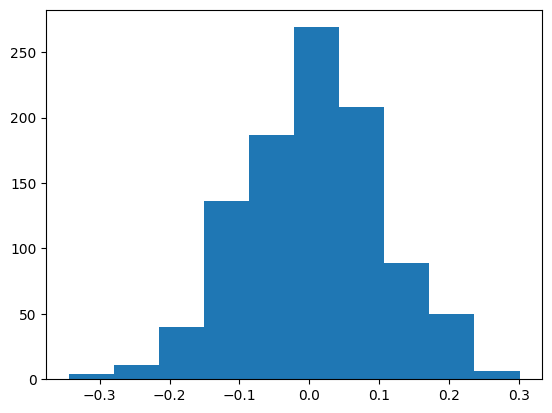

In [ ]:
ccY = X.corrwith(Y)
plt.hist(ccY)
print('"гены",корреляции для которых > 0.5 = ', ccY[ccY > 0.5].sum())

1000.0


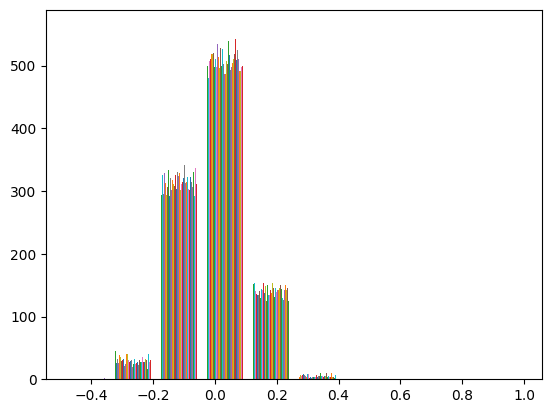

In [ ]:
ccX = X.corr()
plt.hist(ccX)
print(ccX[ccX > 0.5].sum().sum())

In [ ]:
## Попробуйте использовать меньшее количество переменных: D = 100, 500, 5000

In [ ]:
N = 30
D = 100
Y = pd.Series(np.random.normal(0, 1, N))
X = pd.DataFrame( np.random.normal(0, 1, (N, D)) )

"гены",корреляции для которых > 0.5 =  0.0


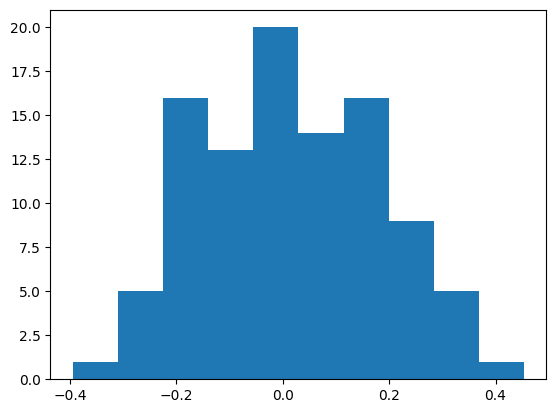

In [ ]:
ccY = X.corrwith(Y)
plt.hist(ccY)
print('"гены",корреляции для которых > 0.5 = ', ccY[ccY > 0.5].sum())

106.48622134117578


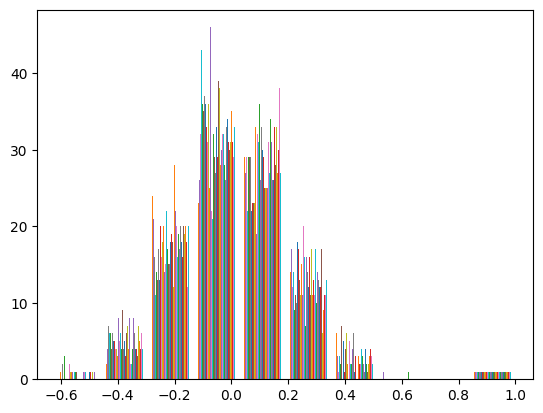

In [ ]:
ccX = X.corr()
plt.hist(ccX)
print(ccX[ccX > 0.5].sum().sum())

In [ ]:
## Чем обусловлены наши проблемы с этим набором данных? Как можно бороться со случайными корреляциями?
## Если размер данных +- одного порядка, то данные коррелируют между собой меньше, чем при разных размерах (например N = 10, D = 10000)
## борьба со случ. корр. : увеличение объема данных, бутстрэп

In [ ]:
## Почему при тестировании нескольких статистических гипотез необходимо проводить поправку на множественную проверку гипотез?
## При сравнении нескольких гипотез, при отвержнии основной гипотезы возникает ошибка 1 рода. С ростом количества выводов вероятность такого события резко возрастает

Тем, для кого выражение "p-hacking" незнакомо -- обязательно смотреть статьи:
* https://en.wikipedia.org/wiki/Data_dredging
* https://ru.wikipedia.org/wiki/Поправка_на_множественную_проверку_гипотез
* http://www.machinelearning.ru/wiki/index.php?title=Множественная_проверка_гипотез

Для развлечения:  
http://www.tylervigen.com/spurious-correlations

### 3. Полиномиальная регрессия (1 балл).

Вам предлагается самим поэксперементировать с построением полиномиальной регрессией, способной приблизить функцию **myy**. Постройте модели для нескольких степеней (1, 2, 4, 15) и определите среднеквадратичную ошибку предсказания. Какая модель является на ваш взгляд оптимальной? Почему? С какими проблемами мы столкнулись при построении моделей (что иллюстрирует этот эксперимент)?

In [ ]:
from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def myy(x):
    return np.cos(1.5 * np.pi * x)

def poly_lm(X,y, dg):
    polynomial_features = PolynomialFeatures(degree=dg,
                                             include_bias=False)
    linear_regression = lm.LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    return pipeline

np.random.seed(0)
X = np.random.rand(70) ## набор тренировочных данных X
y = myy(X) + np.random.randn(70) * 0.1 ## набор истинных значений y для тренировочного набора

X_test = np.linspace(-.01, 1.01, 30)  ## набор тестовых данных X
y_test = myy(X_test) ## набор истинных значений y для тестового набора

In [ ]:
## получим модель для степени = 1, 2, 4, 15
mod1 = poly_lm( X, y, dg = 1  )
## выполним предсказание для тестового набора
y_t1 = mod1.predict(X_test[:, np.newaxis])
## определите среднеквадратичную ошибку предсказания для тестового набора и для тренировочного набора
mse_1 = metrics.mean_squared_error(y_test, y_t1)
print(mse_1)

0.2182509327266069


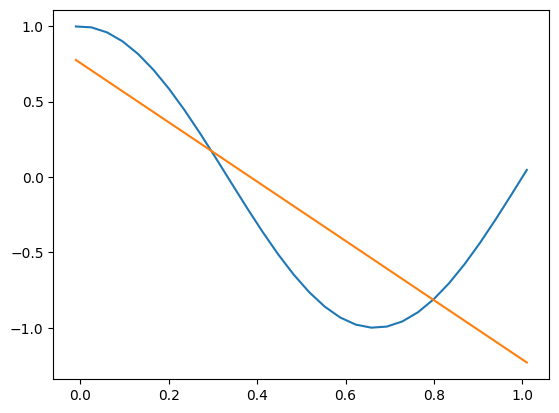

In [ ]:
plt.plot(X_test, y_test)
plt.plot(X_test, y_t1)

In [ ]:
## аналогично поступите для степени 2
mod2 = poly_lm( X, y, dg = 2  )
y_t2 = mod2.predict(X_test[:, np.newaxis])
mse_2 = metrics.mean_squared_error(y_test, y_t2)
print(mse_2)

0.04580414819512739


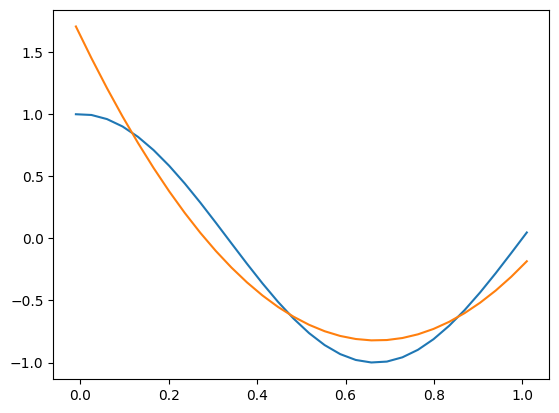

In [ ]:
plt.plot(X_test, y_test)
plt.plot(X_test, y_t2)

In [ ]:
##  для степени 4
mod4 = poly_lm( X, y, dg = 4  )
y_t4 = mod4.predict(X_test[:, np.newaxis])
mse_4 = metrics.mean_squared_error(y_test, y_t4)
print(mse_4)

0.00151125786090738


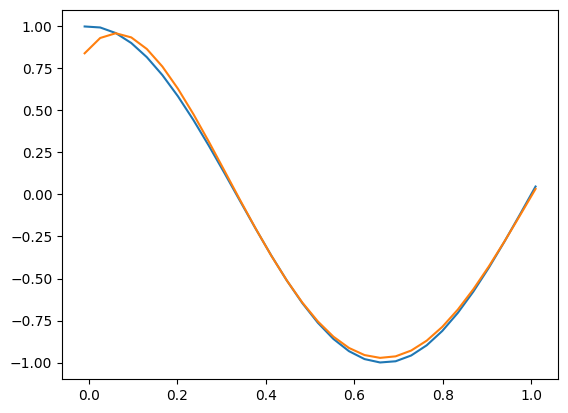

In [ ]:
plt.plot(X_test, y_test)
plt.plot(X_test, y_t4)

In [ ]:
##  для степени 15
mod15 = poly_lm( X, y, dg = 15  )
y_t15 = mod15.predict(X_test[:, np.newaxis])
mse_15 = metrics.mean_squared_error(y_test, y_t15)
print(mse_15)

0.2821032411097693


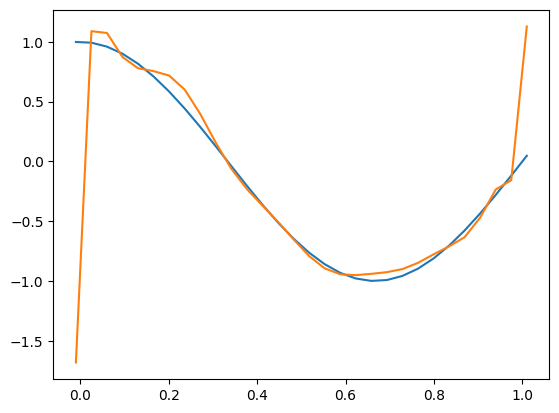

In [ ]:
plt.plot(X_test, y_test)
plt.plot(X_test, y_t15)

In [ ]:
## Какая модель является на ваш взгляд оптимальной? Почему? С какими проблемами мы столкнулись при построении моделей?
## наиболее оптимальной является модель полинома 4 степени, среднекв. ошибка наименьшая.
## При увеличении степени полинома ошибка может возрастать из-за переобучения модели либо из-за возникающих неустойчивостей(в нашем случае 2)

### 4. Шкалирование данных (2 балла).

Для этого задания часть датасетов генерируется в коде, часть - приложена в виде файла к вашему ДЗ. Необходимо ответить на следующие вопросы:
1. Зачем нужно проводить шкалирование данных?
2. Всегда ли это нужно делать?
3. Какой/какие из предоставленных вам наборов надо шкалировать? Обоснуйте свой ответ при помощи кода.

In [ ]:
#1. нужно для повышения стабильности алгоритмов, сходимости, избежание доминирующих признаков, полезно, если алгоритмы используют расстояния между объектами
#2. нет. если алгоритмы устойчивы к масштабу данных или не нужных их абсолютные значения; если все параметры одного масштаба

In [ ]:
X1, Y1 = make_classification(n_samples=500, n_features=50,
                             n_informative=20, n_redundant=10,
                             n_repeated=0, n_classes=3,
                             n_clusters_per_class=1,
                             weights=None, # The proportions of samples assigned to each class.
                                           # If None, then classes are balanced.
                             flip_y=0.01, class_sep=1.0,
                             hypercube=True,
                             shift=1.0,
                             scale=None,
                             shuffle = False,
                             random_state=42)

X2, Y2 = make_classification(n_samples=500, n_features=50,
                             n_informative=20, n_redundant=10,
                             n_repeated=0, n_classes=3,
                             n_clusters_per_class=1,
                             weights=None, # The proportions of samples assigned to each class.
                                           # If None, then classes are balanced.
                             flip_y=0.01, class_sep=1.0,
                             hypercube=True,
                             shift=1.0,
                             scale=1,
                             shuffle = False,
                             random_state=42)

XY3 = pd.read_csv('/content/drive/MyDrive/Classroom/Курс АД и МО (ФИТ - 2024)/София Дмитриевна Обершт - X3.csv')
X3, Y3 = XY3.iloc[:,1:], XY3.Y

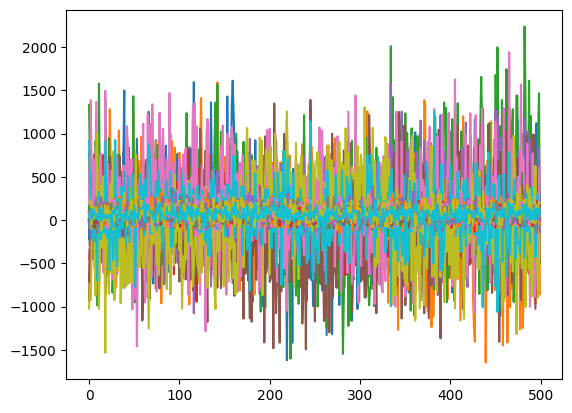

In [ ]:
g = plt.plot(X1)

In [ ]:
df1 = pd.DataFrame(X1)

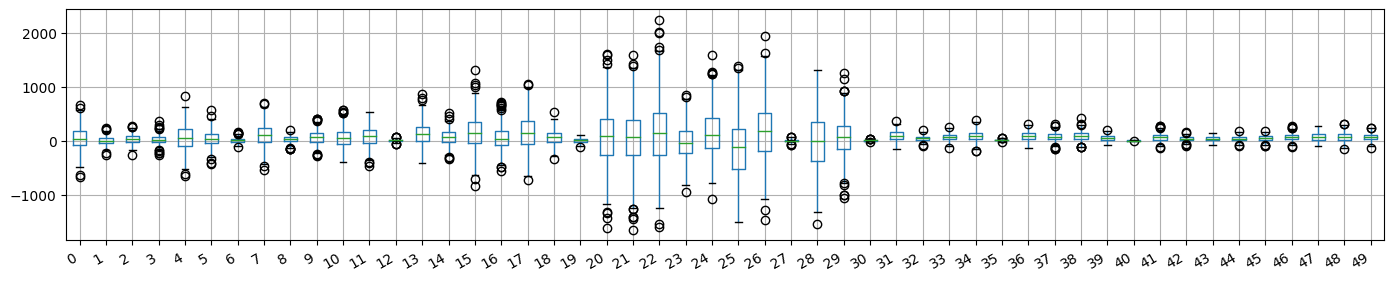

In [ ]:
g1 = df1.boxplot(figsize = (17,3))
_ = plt.setp(g1.get_xticklabels(), rotation=30, horizontalalignment='right')

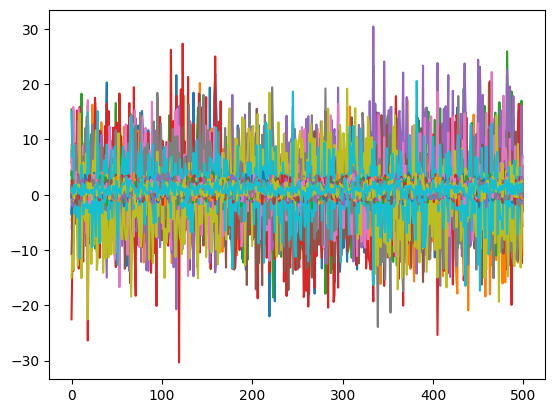

In [ ]:
g = plt.plot(X2)

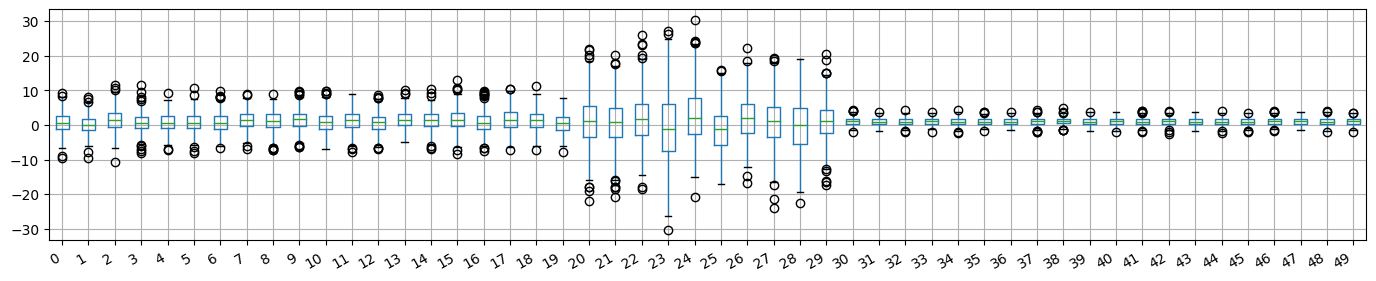

In [ ]:
df2 = pd.DataFrame(X2)
g2 = df2.boxplot(figsize = (17,3))
_ = plt.setp(g2.get_xticklabels(), rotation=30, horizontalalignment='right')

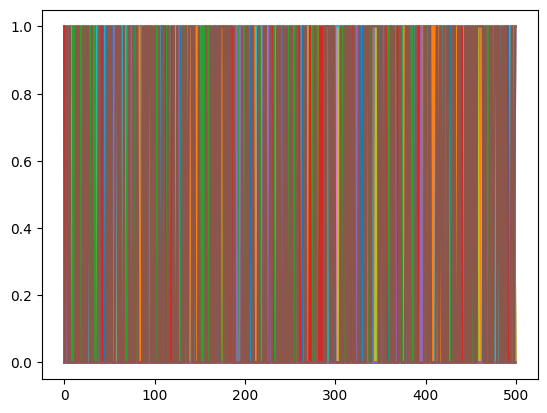

In [ ]:
plt.plot(X3)

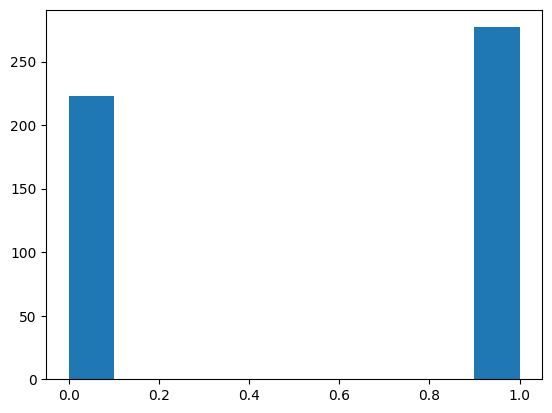

In [ ]:
plt.hist(Y3)

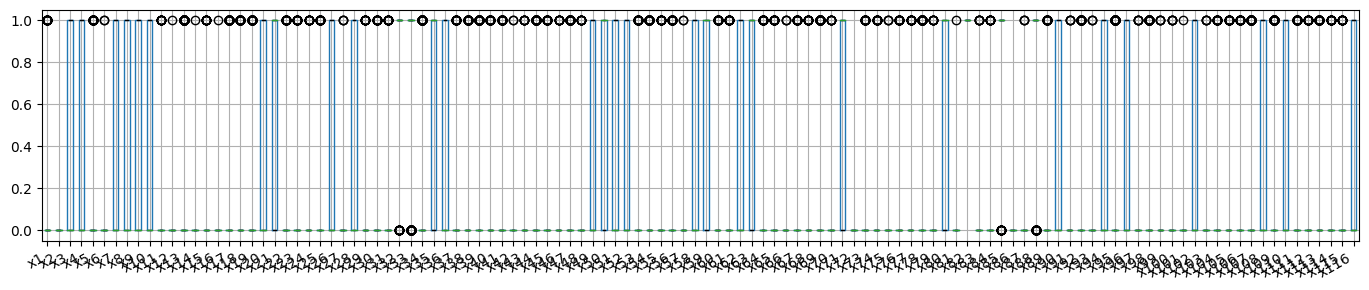

In [ ]:
df3 = pd.DataFrame(X3)
g3 = df3.boxplot(figsize = (17,3))
_ = plt.setp(g3.get_xticklabels(), rotation=30, horizontalalignment='right')

In [ ]:
# шкалирование необходимо провести для первых двух наборов данных, поскольку у них большой разброс значений
#а также по дисперсии видно, что некоторые из параметров превосходятостальные в каждом наборе

### 5. Неразмеченные данные (2 балла).

Вам дан набор неразмеченных данных X4. Проведите его анализ с помощью PCA, визуализируйте результат. Какие выводы вы можете сделать? Чем может быть обусловлена такая картина? Как стоит поступить? Можете сразу проверить свою гипотезу.

In [ ]:
X4 = pd.read_csv('/content/drive/MyDrive/data_4.csv')

In [ ]:
X4

,0,1,2,3,4,5,6,7,8,9
0,-8.191747,-11.726875,6.332432,-6.998539,13.595418,12.754153,9.300435,-7.889161,-9.053623,-9.868462
1,-7.235963,-9.966740,11.111664,-8.252997,7.565668,11.745657,12.450596,-12.343645,-9.770047,-9.524445
2,-11.312542,-9.817638,8.650211,-8.480148,12.768769,10.746079,11.613801,-6.248635,-7.468400,-12.032515
3,-10.288081,-9.264625,9.602822,-10.158620,7.690229,13.703848,13.791998,-9.378393,-9.780879,-11.177039
4,-8.694749,-11.215950,11.657610,-11.226347,7.869665,10.586798,12.766609,-8.540318,-6.434758,-7.773881
...,...,...,...,...,...,...,...,...,...,...
95,-9.631015,-7.404715,11.636950,-10.868193,12.504409,9.565452,8.848056,-7.962540,-8.946843,-7.310449
96,10.601928,-8.522289,14.094532,-9.926466,-7.870601,7.374677,-7.376837,11.327158,9.944444,10.702956
97,-8.336420,-9.457868,11.137730,-9.098032,9.782024,12.396122,9.763837,-10.569626,-9.534385,-8.981252
98,-9.678749,-10.157522,12.733116,-8.871184,9.245531,12.175545,12.746368,-8.334017,-7.821828,-9.528873


In [ ]:
## Проведите его анализ с помощью PCA.
## Визуализируйте результат.
from sklearn.decomposition import PCA
import plotly.express as px
pca = PCA()
vars = pca.fit_transform(X = X4)
pca.explained_variance_ #значения объясненной дисперсии для каждого из ГК

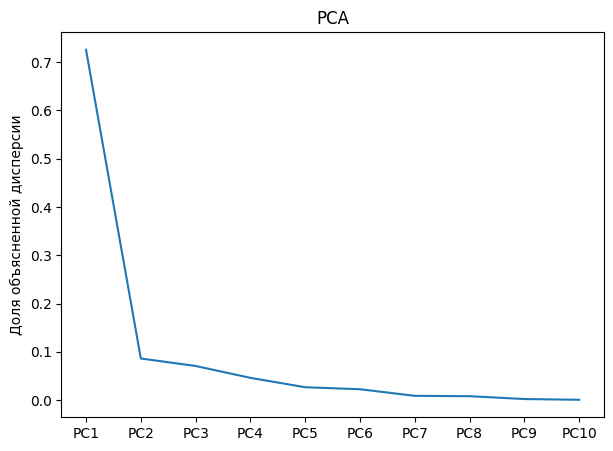

In [ ]:
_ = plt.figure(figsize = (7, 5))
ax = sns.lineplot(y = pca.explained_variance_ratio_, x = range(10))
ax.set_title('PCA')
ax.set_ylabel('Доля объясненной дисперсии')
ax.set(xticks = range(10), xticklabels = [f'PC{i+1}' for i in range(10)]);

In [ ]:
#бОльшая часть дисперсии приходится на 1 признак

<Axes: >

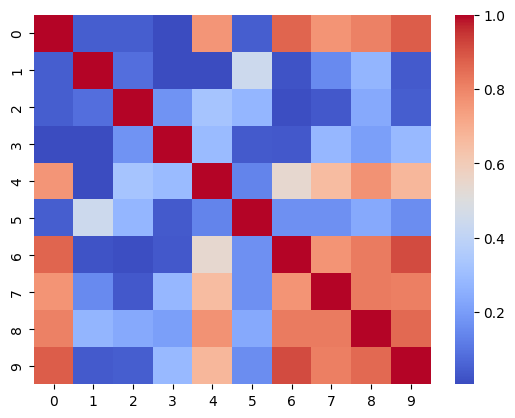

In [ ]:
sns.heatmap(abs(X4.corr()), cmap = 'coolwarm')

In [ ]:
# последние признаки коррелируют между собой
# нужно проводить шкалирование данных и убирать сильно коррелирующие данные

### 6. Серийные эффекты (2 балла).

Здесь мы наглядно познакомимся с тем, что такое серийные эффекты (batch effect).
Вам дан набор данных 'expr_data.tsv'.
1. Какая переменная в вашем наборе данных указывает на возможное присутствие серийных эффектов? С чем могут быть связаны серийные эффекты?
2. Ваша задача попытаться найти маркерные признаки. Имеет ли ваша задача решение?
3. Какие проблемы вы заметили в данных? Можно ли с ними бороться? Имеет ли это смысл в данном случае?

Обязательно посмотрите на все переменные. Можете провести PCA, покрасить точки по классам, по каким-то интересным факторам...

In [ ]:
X5 = pd.read_csv('/content/drive/MyDrive/expr_data.tsv', sep = '\t')
X5

,sample,class,edate,library,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,...,Gene991,Gene992,Gene993,Gene994,Gene995,Gene996,Gene997,Gene998,Gene999,Gene1000
0,Cell1,treated,2016-04-01,63794,1,4,896,174,23,0,...,1,9,6,6,0,12,0,0,48,3
1,Cell2,treated,2016-04-01,64673,1,0,841,94,42,0,...,0,9,5,9,1,18,3,1,31,12
2,Cell3,treated,2016-04-01,63282,1,1,717,145,29,0,...,6,18,5,17,1,30,5,4,48,15
3,Cell4,treated,2016-04-01,66196,2,0,977,92,30,0,...,10,14,19,30,0,26,3,1,55,5
4,Cell5,treated,2016-04-01,77022,2,0,1018,213,40,0,...,15,5,6,19,0,30,7,0,77,22
5,Cell6,treated,2016-04-01,53382,4,2,684,120,25,0,...,2,9,8,44,2,26,12,1,35,2
6,Cell7,treated,2016-04-01,86665,1,5,1169,243,57,0,...,3,13,12,9,0,25,5,1,53,6
7,Cell8,treated,2016-04-01,71413,0,8,793,122,58,0,...,3,7,3,31,6,17,3,4,36,9
8,Cell9,treated,2016-04-01,51566,0,1,575,122,30,0,...,3,8,4,26,0,30,5,0,47,14
9,Cell10,treated,2016-04-01,59480,1,3,621,161,22,0,...,1,12,3,14,1,22,6,2,31,6


In [ ]:
X5.iloc[:,4:].describe()

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,...,Gene991,Gene992,Gene993,Gene994,Gene995,Gene996,Gene997,Gene998,Gene999,Gene1000
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1.488889,1.866667,1056.177778,124.444444,31.733333,0.0,17.777778,1.666667,0.244444,27.533333,...,3.555556,7.777778,6.888889,19.466667,0.866667,32.022222,6.111111,1.977778,44.866667,7.777778
std,1.486641,2.351015,469.700886,44.226974,12.395747,0.0,9.336850,2.486326,0.679423,11.416893,...,2.856854,4.601822,5.139960,10.597169,1.618080,14.277269,4.768372,2.624092,13.444499,4.718864
min,0.000000,0.000000,508.000000,62.000000,12.000000,0.0,4.000000,0.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,6.000000,0.000000,9.000000,0.000000,0.000000,22.000000,1.000000
25%,0.000000,0.000000,754.000000,94.000000,22.000000,0.0,12.000000,0.000000,0.000000,20.000000,...,2.000000,5.000000,3.000000,12.000000,0.000000,23.000000,3.000000,0.000000,34.000000,5.000000
50%,1.000000,1.000000,977.000000,120.000000,30.000000,0.0,16.000000,1.000000,0.000000,25.000000,...,3.000000,7.000000,6.000000,17.000000,0.000000,30.000000,5.000000,1.000000,42.000000,7.000000
75%,2.000000,2.000000,1194.000000,148.000000,40.000000,0.0,22.000000,3.000000,0.000000,36.000000,...,4.000000,10.000000,10.000000,25.000000,1.000000,40.000000,8.000000,3.000000,53.000000,10.000000
max,6.000000,10.000000,2810.000000,261.000000,58.000000,0.0,47.000000,14.000000,3.000000,57.000000,...,15.000000,24.000000,19.000000,54.000000,8.000000,66.000000,20.000000,10.000000,82.000000,22.000000


In [ ]:
X5.columns[4:10]

Index(['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6'], dtype='object')

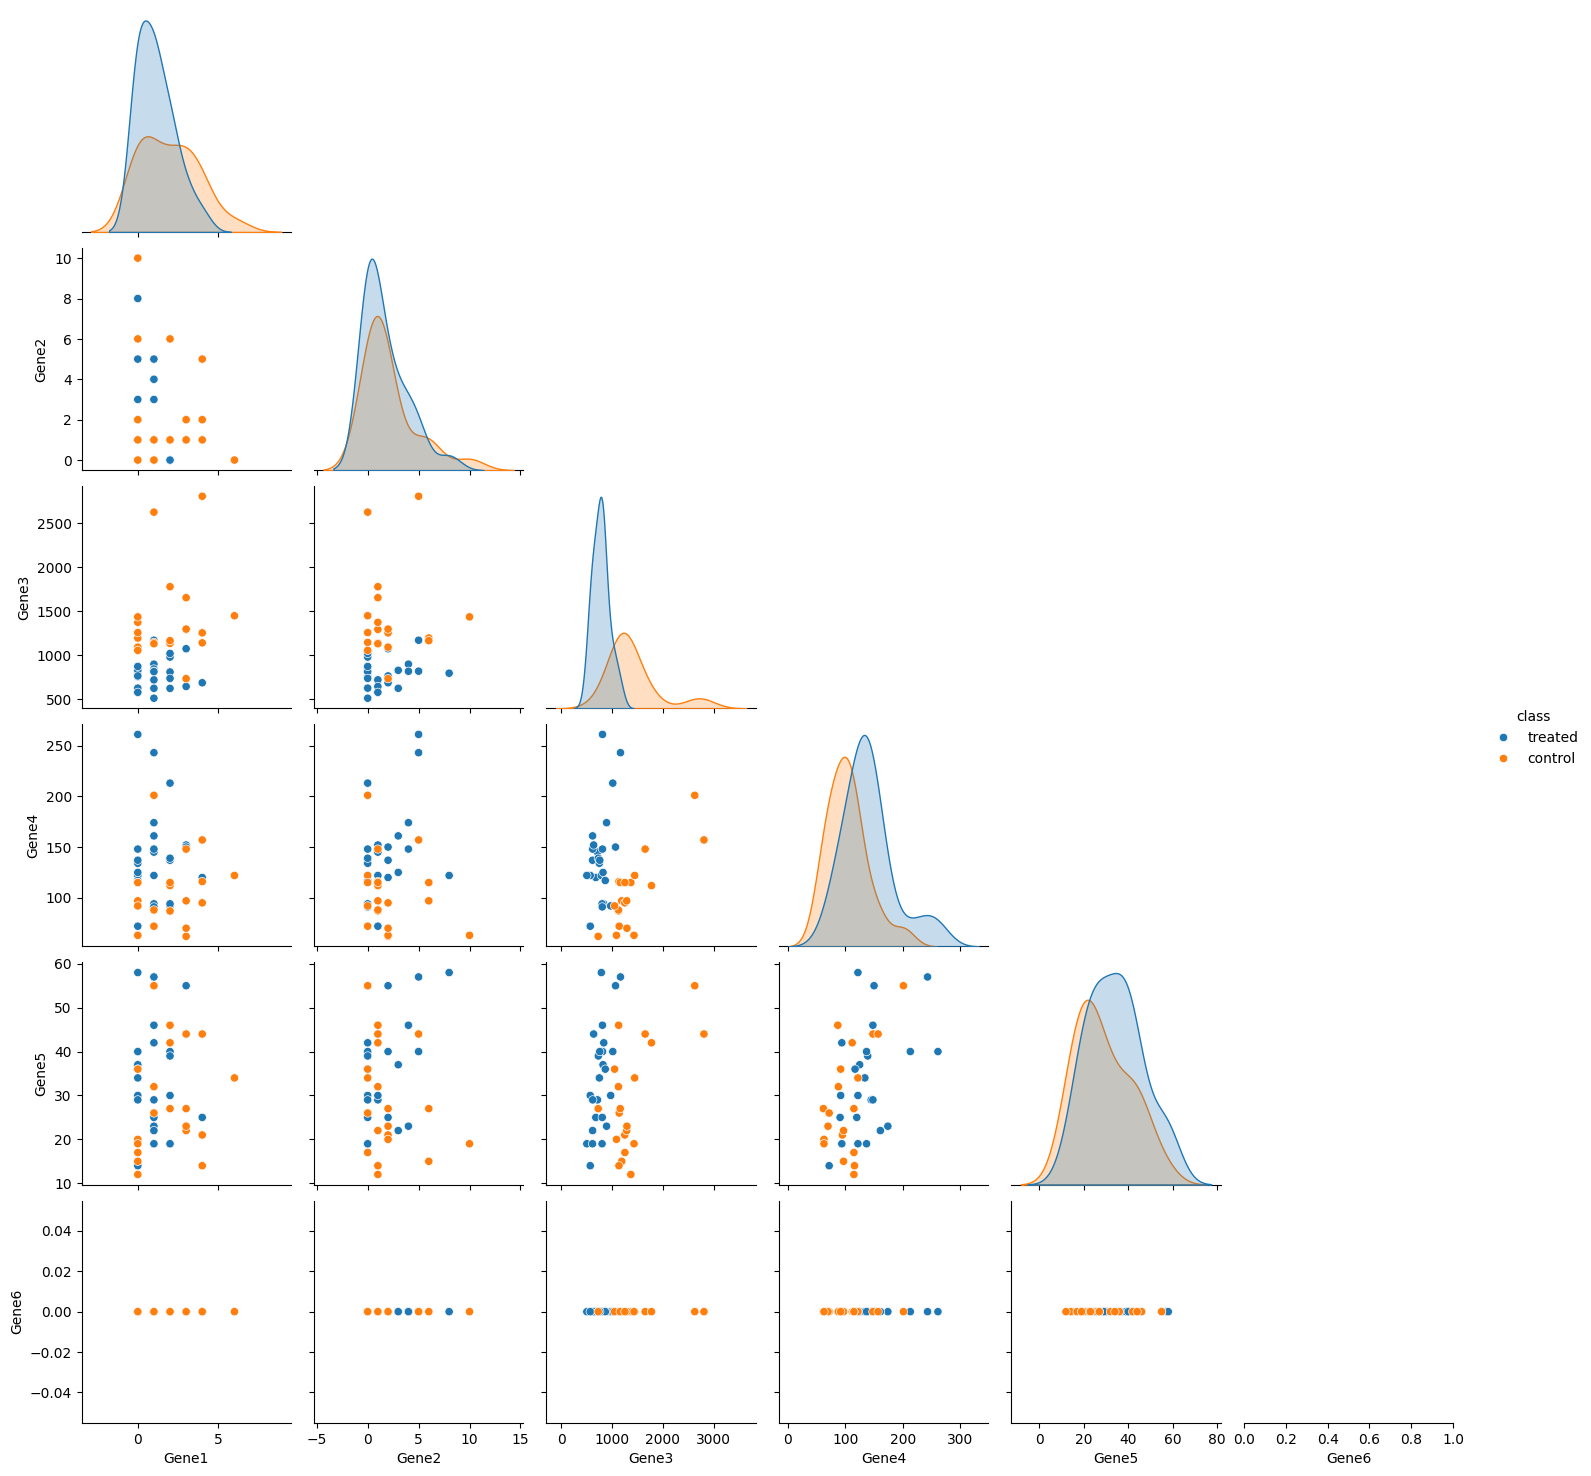

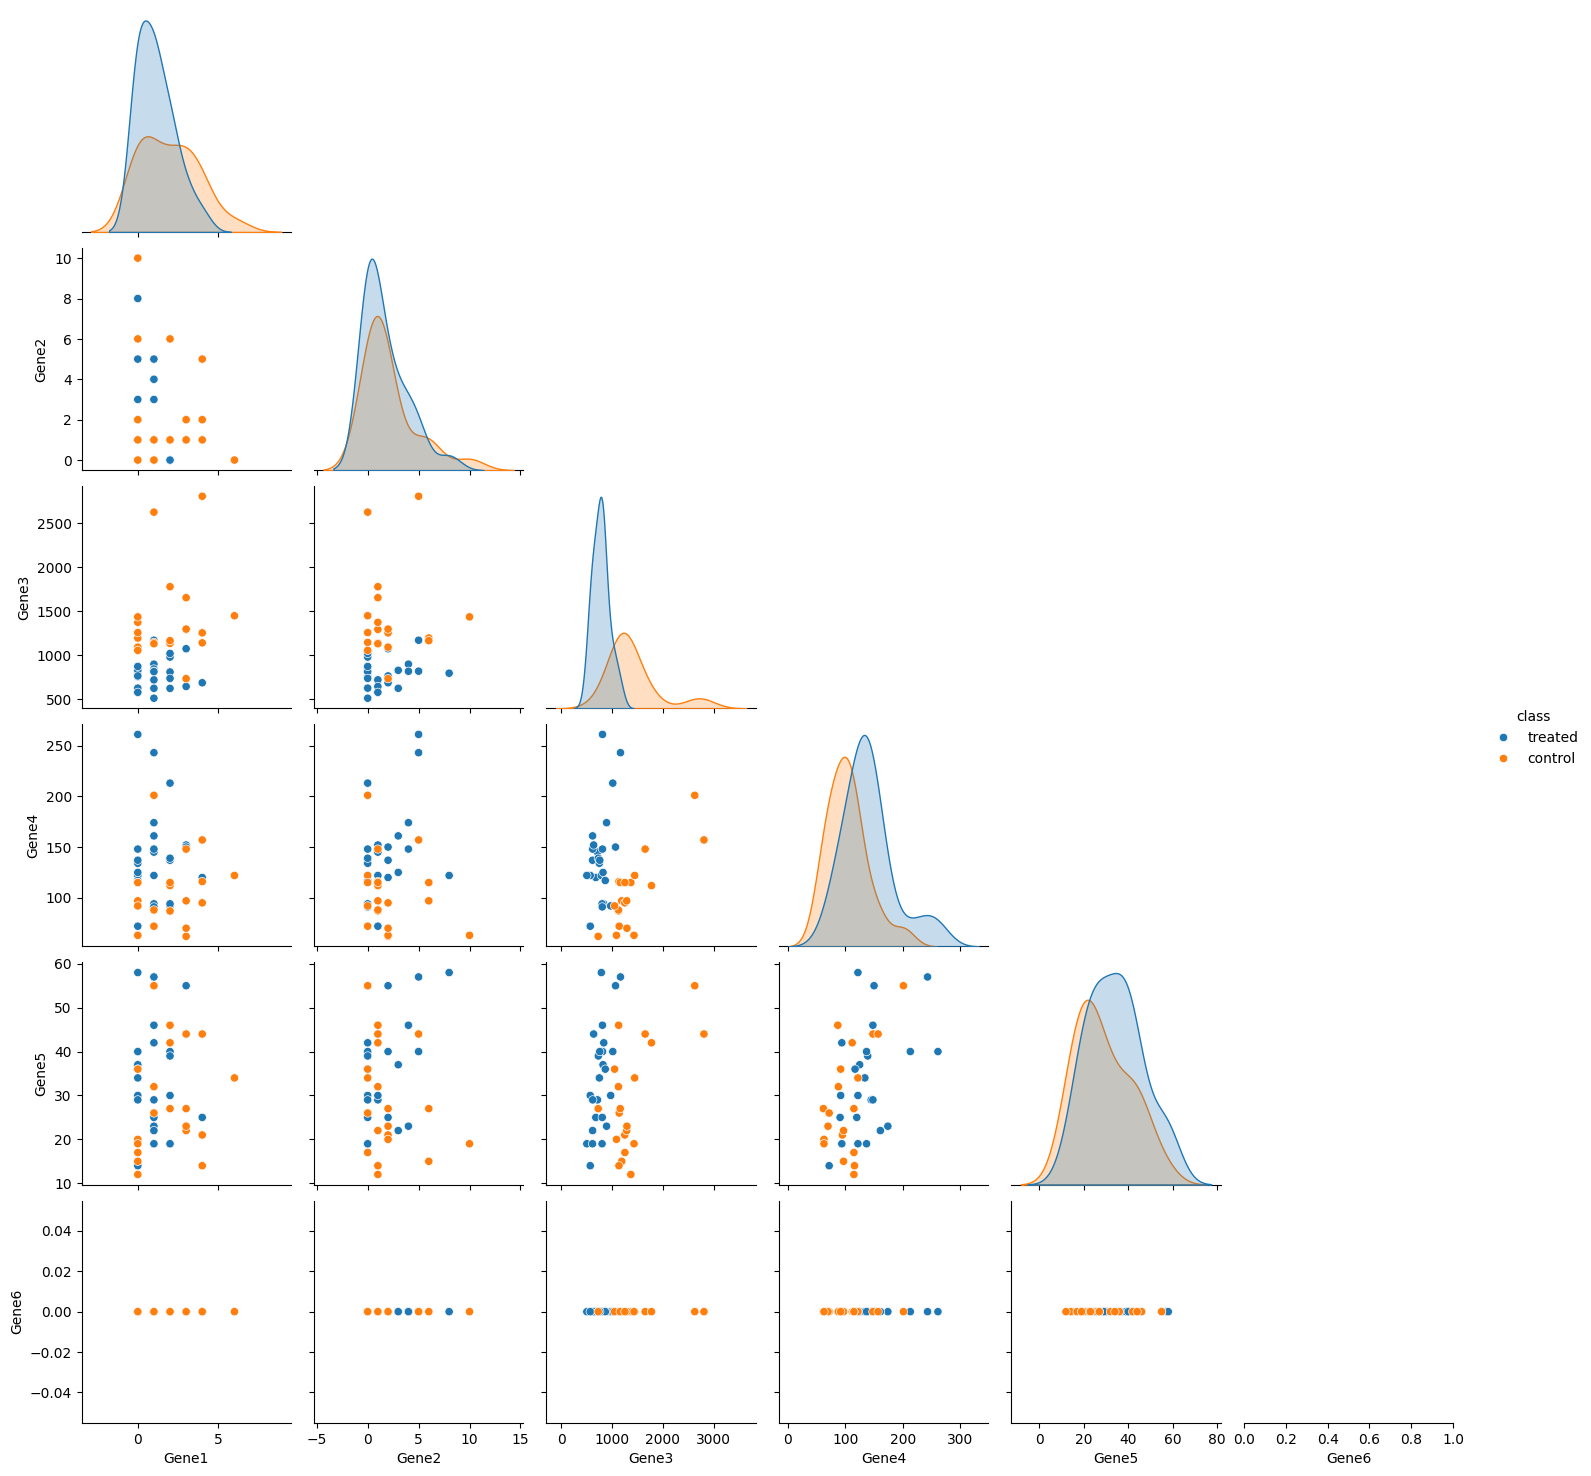

In [ ]:
x = X5.columns[4:10]#X5.iloc[:, 4:10]
sns.pairplot(vars = x, data = X5, hue = 'class', corner = 'True')

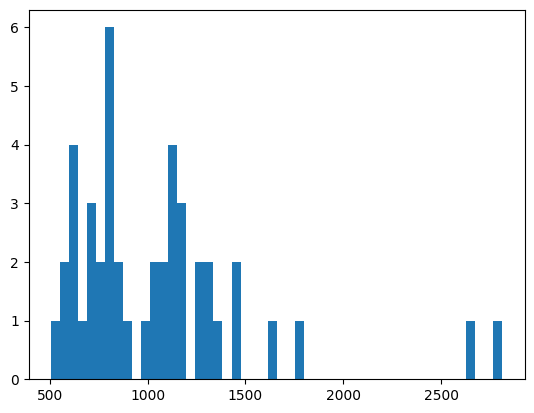

In [ ]:
g = plt.hist(X5['Gene3'], bins = 50)

In [ ]:
X5['Gene3_class'] = np.where(X5.Gene3 > 1000, 1, 0)
X5['Gene3_class']

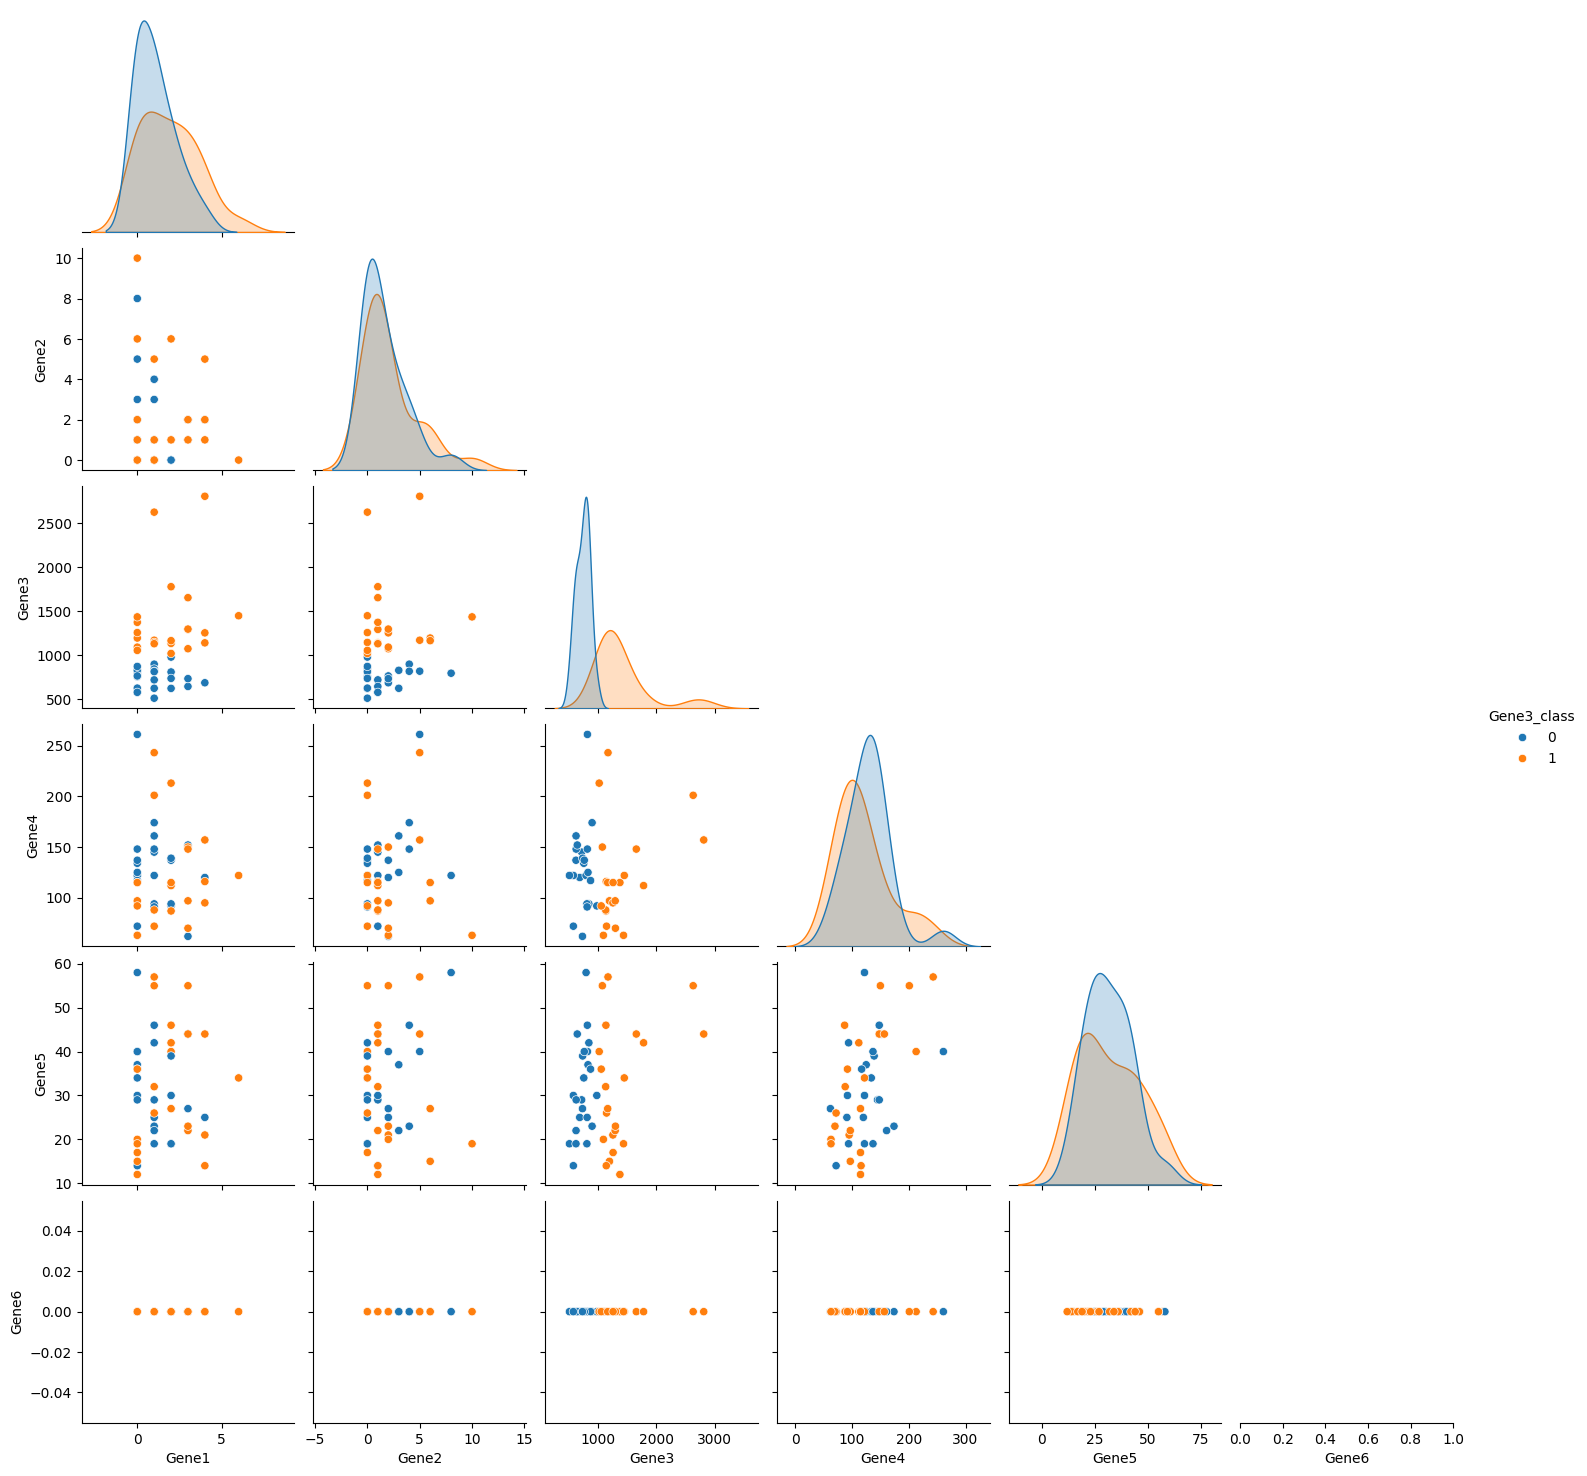

In [ ]:
x = X5.columns[4:10]#X5.iloc[:, 4:10]
sns.pairplot(vars = x, data = X5, hue = 'Gene3_class', corner = 'True')

In [ ]:
pca = PCA(n_components = 10)
components = pca.fit_transform(X5.iloc[:,4:])

In [ ]:
len(components)

45

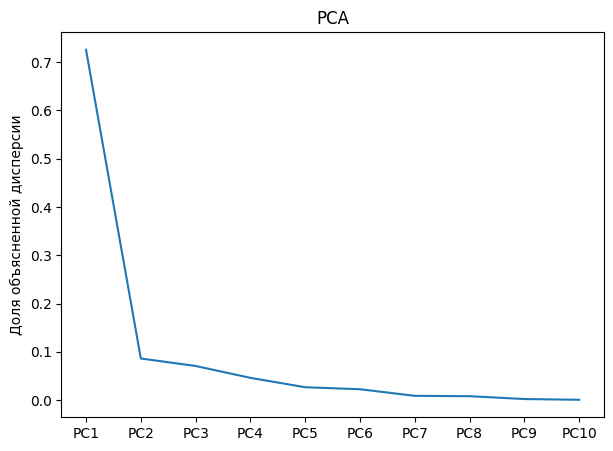

In [ ]:
_ = plt.figure(figsize = (7, 5))
ax = sns.lineplot(y = pca.explained_variance_ratio_, x = range(10))
ax.set_title('PCA')
ax.set_ylabel('Доля объясненной дисперсии')
ax.set(xticks = range(10), xticklabels = [f'PC{i+1}' for i in range(10)]);

In [ ]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(10),
    color = X5['class']
)

fig.update_traces(diagonal_visible=False)
fig.update_layout(
    width=1000,
    height=1200
)
fig.show()

In [ ]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color = X5['class']
)

fig.update_traces(diagonal_visible=False)
fig.update_layout(
    width=500,
    height=600
)
fig.show()